In [1]:
import pandas as pd # table (data frame)
import numpy as np # array

import scipy.stats as stats
import statsmodels 
import matplotlib.pyplot as plt
import math
from pprint import pprint
plt.style.use('seaborn-darkgrid')


# Exam 
These cells should be executed in order

## Problem 1

In [2]:
# You should already have the code for this problem from the practice exercises and assignment 1 
data1 = pd.read_csv("problem1.csv")
data1.describe()

,x_1,x_2,x_3,x_4,x_5
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000
mean,1.778804,4.011732,2.483685,9.980265,0.779326
std,2.076959,1.678924,0.972443,4.495523,0.414821
min,-5.864541,-1.421232,-0.775178,1.043870,0.000000
25%,0.404845,2.865579,1.836651,6.557236,1.000000
50%,1.762989,3.968334,2.461202,9.239174,1.000000
75%,3.166382,5.129624,3.147620,12.497966,1.000000
max,8.819015,12.258041,6.234784,30.767951,1.000000


### Question 1.1: centrality

In [3]:
mean_2 = sum(data1.x_2)/data1.x_2.size
print("For example, the sample mean", mean_2)
print("This is equivalent to np.mean(data1.x_2)", np.mean(data1.x_2))

For example, the sample mean 4.0117318924569
This is equivalent to np.mean(data1.x_2) 4.0117318924569005


### Question 1.2: dispersion

In [4]:
mean_1 = sum(data1.x_1)/data1.x_1.size
std_1 = np.sqrt(sum((data1.x_1-mean_1)**2)/(data1.x_1.size-1))
print("For example, the (unbiased) sample standard deviation", std_1)
print("This is equivalent to np.std(data1.x_1, ddof=1)", np.std(data1.x_1, ddof=1))

For example, the (unbiased) sample standard deviation 2.076958917249583
This is equivalent to np.std(data1.x_1, ddof=1) 2.076958917249583


### Question 1.3: dependence

In [5]:
N, d = data1.shape
std_2 = np.sqrt(sum((data1.x_2-mean_2)**2)/(data1.x_2.size-1))
cov = sum((data1.x_1-mean_1)*(data1.x_2-mean_2))/(N-1)
corr = cov/(std_1*std_2)
print("For example, the covariance %f or the correlation %f"% (cov, corr))
print("This is equivalent to np.cov(data1.x_1, data1.x_2, ddof=1)[0,1] (%f) and np.corrcoef(data1.x_1, data1.x_2)[0,1] (%f), respectively"%(np.cov(data1.x_1, data1.x_2, ddof=1)[0,1], np.corrcoef(data1.x_1, data1.x_2)[0,1]))

For example, the covariance 2.555869 or the correlation 0.732959
This is equivalent to np.cov(data1.x_1, data1.x_2, ddof=1)[0,1] (2.555869) and np.corrcoef(data1.x_1, data1.x_2)[0,1] (0.732959), respectively


### Question 1.4: data quantile

In [6]:
def quantile(data, p):
    return np.sort(data)[np.ceil(p*N).astype(int)]
p = 0.3
# It is also fine to use other interpolation method
print("0.3-quantile:", quantile(data1.x_3, p))
print("This is equivalent to np.quantile(data1.x_3, p, interpolation='higher')", 
      np.quantile(data1.x_3, p, interpolation="higher"))

0.3-quantile: 1.9626764948788067
This is equivalent to np.quantile(data1.x_3, p, interpolation='higher') 1.9626764948788067


### Question 1.5: probabilitic model

The maximum likelihood estimates are mu=2.483685 and sigma=0.972443


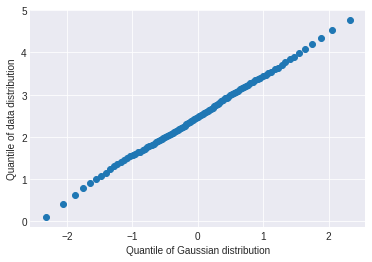

In [7]:
ps = np.linspace(0, 1, 100, endpoint=False) 
quantile_data = quantile(data1.x_3, ps)
quantile_norm = stats.norm.ppf(ps)
fig, ax = plt.subplots(1, 1)
ax.scatter(quantile_norm, quantile_data)
ax.set_xlabel("Quantile of Gaussian distribution")
ax.set_ylabel("Quantile of data distribution")
mean_3 = sum(data1.x_3)/data1.x_3.size
std_3 = np.sqrt(sum((data1.x_3-mean_3)**2)/(data1.x_3.size-1))
print("The maximum likelihood estimates are mu=%f and sigma=%f"%(mean_3, std_3))

## Problem 2

### Question 2.1

In [8]:
# You should have the code for this question from assignment 1
def hist_continuous(x, bin):
    step = (x.max() - x.min())/bin
    bins = np.arange(x.min(), x.max()+step, step)
    freqs = []
    for ib in range(1, bins.size):
        idx = (x>bins[ib-1]) & (x<=bins[ib])
        freqs.append(idx.sum())
    freqs[0] += x[x==x.min()].size    
    return freqs, bins

n_bins = 30
freqs, bins = hist_continuous(data1.x_4, n_bins)

# For reference
freqs_np, bins_np = np.histogram(data1.x_4, n_bins)

# Simple test
np.testing.assert_almost_equal(freqs, freqs_np)
np.testing.assert_almost_equal(bins, bins_np)


### Question 2.2

The degrees of freedom is 9.452516


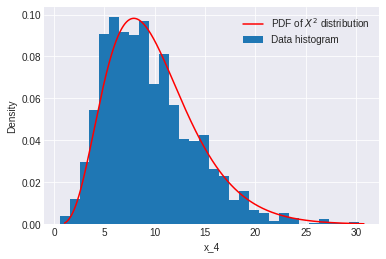

In [9]:
x_4_params_chi2 = stats.chi2.fit(data1.x_4, loc=0, scale=1)
print("The degrees of freedom is %f"%x_4_params_chi2[0])

x = np.linspace(data1.x_4.min(), data1.x_4.max(), 1000)
fig, ax = plt.subplots(1, 1)
ax.bar(bins[:-1], freqs/sum(freqs), width=(data1.x_4.max()-data1.x_4.min())/n_bins, label="Data histogram")
distribution_x_4 = stats.chi2(*x_4_params_chi2)
ax.plot(x, distribution_x_4.pdf(x), color="red", label=r"PDF of $X^2$ distribution")
ax.set_xlabel("x_4")
ax.set_ylabel("Density")
ax.legend();

### Question 2.3

In [10]:
def compute_ecdf(x, mode):
    x = np.sort(x)
    n = x.size
    if mode == "l":
        y = np.arange(0., n)/n
    elif mode == "h":
        y = np.arange(1., n+1)/n    
    return x, y

sorted_x, ecdf = compute_ecdf(data1.x_4, "h")

### Question 2.4

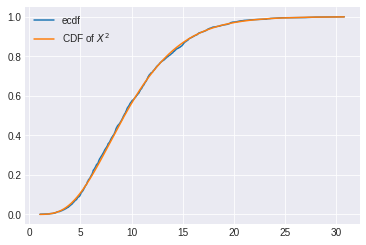

In [11]:
chi2_cdf = distribution_x_4.cdf(sorted_x)

fig, ax = plt.subplots(1, 1)
ax.plot(sorted_x, ecdf, label = "ecdf")
ax.plot(sorted_x, chi2_cdf, label = r"CDF of $X^2$")
ax.legend();

### Question 2.5

Rejection region for alpha=0.05 is (0.032629, +infinity)


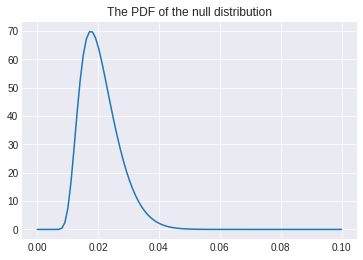

In [12]:
from scipy.stats import kstwo
N = data1.shape[0]
distribution_ks = kstwo(N)
fig, ax = plt.subplots(1, 1)
kx = np.linspace(0, 0.1, 100)
ax.set_title("The PDF of the null distribution")
ax.plot(kx, distribution_ks.pdf(kx))
alpha = 0.05
rejection_region_005 = distribution_ks.ppf(1-alpha)
print("Rejection region for alpha=0.05 is (%f, +infinity)"%rejection_region_005)

### Question 2.6

In [13]:
_, lecdf = compute_ecdf(data1.x_4, "l")
distribution_chi2_test = stats.chi2(df=10)
cdf = distribution_chi2_test.cdf(sorted_x)
# It is okay to have D=max(np.abs(ecdf-cdf)) here
D = max(np.max(ecdf - cdf), np.max(cdf - lecdf)) # this is to handle the "discontinuity" of the ecdf function
print("Test statistic", D)
print("p-value", distribution_ks.sf(D))
print("This should be equivalent to:", stats.kstest(data1.x_4, distribution_chi2_test.cdf))
print("For alpha=0.1, p-value>alpha => fail to reject the null hypothesis")

Test statistic 0.019089370781413262
p-value 0.5504501100077585
This should be equivalent to: KstestResult(statistic=0.019089370781413262, pvalue=0.5504501100077585)
For alpha=0.1, p-value>alpha => fail to reject the null hypothesis


### Question 2.7

In [14]:
distribution_gaussian_test = stats.norm(loc=10, scale=4)
cdf_gaussian = distribution_gaussian_test.cdf(sorted_x)
D_gaussian = max(np.max(ecdf - cdf_gaussian), np.max(cdf_gaussian - lecdf))
print("Test statistic", D_gaussian)
# sf is the same as 1-cdf; numerically, sf is more accurate  
print("p-value", distribution_ks.sf(D_gaussian))
print("This should be equivalent to:", stats.kstest(data1.x_4, distribution_gaussian_test.cdf))
print("For alpha=0.01, p-value<alpha => reject the null hypothesis")


Test statistic 0.08312023633110921
p-value 8.48212604287841e-11
This should be equivalent to: KstestResult(statistic=0.08312023633110921, pvalue=8.48212604287841e-11)
For alpha=0.01, p-value<alpha => reject the null hypothesis


### Question 2.8

In [15]:
print("Similarities: Q-Q plot and KS-test are both used for comparing two distributions")
print("Differences: Q-Q plot is a visualization tool for interactive analysis, whereas KS-test is a statstical test from a more well defined framework")

Similarities: Q-Q plot and KS-test are both used for comparing two distributions
Differences: Q-Q plot is a visualization tool for interactive analysis, whereas KS-test is a statstical test from a more well defined framework


## Problem 3

In [16]:
# Prep
sigma_control = 27 # known standard deviation 
# Load data:
data3 = pd.read_csv("problem3.csv")
control = data3["control_group_drivers"]
test_gdb = data3["test_drivers_with_green_driving_buddy"]
test_no_gdb = data3["test_drivers_without_green_driving_buddy"]
N_control, N_test = control.size, test_gdb.size # in this problem, they have the same size

### Question 3.1

In [17]:
# Confidence interval for control mean with significance level 0.01
alpha = 0.01
# Alternative 1: assume std is known
z1 = stats.norm.ppf(1-alpha/2) # standard normal distribution for known std
me = z1*sigma_control/np.sqrt(N_control) # margin of error
mean_control = control.mean()
our_solution_z = (mean_control - me, mean_control + me)

# Alternative 2: do not assume std is known
t1 = stats.t.ppf(1-alpha/2, df=N_control-1) # student-t distribution for unknown std
me = t1*control.std(ddof=1)/np.sqrt(N_control)
mean_control = control.mean()
our_solution_t = (mean_control - me, mean_control + me)

# Python library for reference
stats_solution_z = stats.norm.interval(1-alpha, 
                                       loc=control.mean(), 
                                       scale=sigma_control/np.sqrt(N_control))

stats_solution_t = stats.t.interval(1-alpha, 
                                    N_control-1, 
                                    loc=control.mean(), 
                                    scale=stats.sem(control))
print("Interval assuming known std", our_solution_z, stats_solution_z)
print("Interval assuming unknown std", our_solution_t, stats_solution_t)

Interval assuming known std (208.06313771393494, 212.82844643846843) (208.06313771393494, 212.82844643846843)
Interval assuming unknown std (208.0244179106229, 212.86716624178047) (208.0244179106229, 212.86716624178047)


### Question 3.2

In [18]:
print("Assumptions: sampling distribution (i.e. the distribution of the sample mean) is Gaussian <= large N, i.i.d. sample")

Assumptions: sampling distribution (i.e. the distribution of the sample mean) is Gaussian <= large N, i.i.d. sample


### Question 3.3

In [19]:
# 3.3: Is the sample size large enough? If not, what is the smallest sample size? 
l_z = our_solution_z[1] - our_solution_z[0] # assume known std 
l_t = our_solution_t[1] - our_solution_t[0] # do not assume known std
print("Size of confidence intervals: z and t", l_z, l_t)
print("Either way, there are not enough samples")
# In order to find out the minimum number of samples, we need to assume known standard 
# deviation for the computation 
# Derivation: z1*sigma_control/\sqrt(N) \leq 2 => N \geq (z1*sigma_control/2)^2
N_min = math.ceil((z1*sigma_control/2)**2)
print("Need at least %i samples"%(N_min))

Size of confidence intervals: z and t 4.765308724533497 4.842748331157566
Either way, there are not enough samples
Need at least 1210 samples


### Question 3.4

In [20]:
# 3.4: Test difference in the means of control and test_gdb
alpha = 0.02
t0 = (control.mean() - test_gdb.mean())/np.sqrt(control.std(ddof=1)**2/N_control+test_gdb.std(ddof=1)**2/N_test)
df = (control.std(ddof=1)**2/N_control+test_gdb.std(ddof=1)**2/N_test)**2/((control.std(ddof=1)**2/N_control)**2/(N_control-1)+(test_gdb.std(ddof=1)**2/N_test)**2/(N_test-1))
dist_null = stats.t(df=df)
p_one_tailed = min(dist_null.cdf(t0), 1-dist_null.cdf(t0))
p_two_tailed = 2*p_one_tailed
print("Test statistic", t0)
print("Two-tailed test p-value:", p_two_tailed)
print("One-tailed test p-value:", p_one_tailed)
print("This shhould be equivalent to the following")
print("Two-tailed", stats.ttest_ind(control, test_gdb, equal_var=False))
print("One-tailed", stats.ttest_ind(control, test_gdb, alternative="greater", equal_var=False))
print("For both the one- and two-tailed tests, we fail to reject the hypothesis given alpha=0.02")

Test statistic 1.0726750702115897
Two-tailed test p-value: 0.28356913850431775
One-tailed test p-value: 0.14178456925215888
This shhould be equivalent to the following
Two-tailed Ttest_indResult(statistic=1.0726750702115897, pvalue=0.2835691385043177)
One-tailed Ttest_indResult(statistic=1.0726750702115897, pvalue=0.14178456925215885)
For both the one- and two-tailed tests, we fail to reject the hypothesis given alpha=0.02


### Question 3.5

In [21]:
# 3.5: Paired t-test
mxy = (test_no_gdb-test_gdb).mean()
sxy = (test_no_gdb-test_gdb).std(ddof=1)
tp = mxy/(sxy/(N_test**(1/2)))
print("Test statistic, p-value", tp, 2*min(stats.t.cdf(tp, df=N_test-1), stats.t.sf(tp, df = N_test-1)))
print(stats.ttest_rel(test_no_gdb, test_gdb))

Test statistic, p-value 17.844803147000682 9.52490724022833e-61
Ttest_relResult(statistic=17.844803147000682, pvalue=9.52490724022833e-61)


### Question 3.6

In [22]:
# 3.6: McNemar's test
from statsmodels.stats.contingency_tables import mcnemar # for reference
# ----------------------------------------
#            | before eco |  before high |
# ----------------------------------------
# after eco  | n00        |   n10        |
# ----------------------------------------
# after high | n01        |   n11        |
# ----------------------------------------
alpha = 0.02
eco_threshold = 180
n00 = ((test_no_gdb<eco_threshold) & (test_gdb<eco_threshold)).sum()
n01 = ((test_no_gdb<eco_threshold) & (test_gdb>=eco_threshold)).sum()
n10 = ((test_no_gdb>=eco_threshold) & (test_gdb<eco_threshold)).sum()
n11 = ((test_no_gdb>=eco_threshold) & (test_gdb>=eco_threshold)).sum()
print("n00=%i, n01=%i, n10=%i, n11=%i"%(n00, n01, n10, n11))
print("--- Exact McNemars test ---")
s_exact = min(n01, n10)
p_exact = 2*stats.binom.cdf(s_exact, n01 + n10 , 0.5)
print("pvalue is %f"% (p_exact))
print("Test statistic %f"% (s_exact))
print("This should be equivalent to:")
mcnemar_exct = mcnemar([[n00, n10],[n01, n11]], exact=True)
print(mcnemar_exct)
print("--- Approximate McNemars test ---")
s_approx = (np.abs(n01-n10)-1)**2/(n01+n10)
p_approx = stats.chi2.sf(s_approx, df=1)
print("pvalue is %f"% (p_approx))
print("Test statistic %f"% (s_approx))
print("This should be equivalent to:")
mcnemar_approx = mcnemar([[n00, n10],[n01, n11]], exact=False)
print(mcnemar_approx)
print("p-value<alpha for alpha=%f, we reject the null hypothesis"%alpha)
print("We use the McNemar's test because the sample space contains binary outcomes from paired data")

n00=100, n01=3, n10=33, n11=716
--- Exact McNemars test ---
pvalue is 0.000000
Test statistic 3.000000
This should be equivalent to:
pvalue      2.2721360437571997e-07
statistic   3.0
--- Approximate McNemars test ---
pvalue is 0.000001
Test statistic 23.361111
This should be equivalent to:
pvalue      1.3426569116181885e-06
statistic   23.36111111111111
p-value<alpha for alpha=0.020000, we reject the null hypothesis
We use the McNemar's test because the sample space contains binary outcomes from paired data


### Question 3.7

In [23]:
print("This is only a suggested answer; you can be creative with the suggestions!")
print("We wouldn't recommend the company to release the product since we have discrepancy between the paired tests and the two-sample t-test")
print("To improve the conclusion, we could collect more data, design a more comprehensive experiment and conduct different types of analysis on the data")

This is only a suggested answer; you can be creative with the suggestions!
We wouldn't recommend the company to release the product since we have discrepancy between the paired tests and the two-sample t-test
To improve the conclusion, we could collect more data, design a more comprehensive experiment and conduct different types of analysis on the data


## Problem 4

### Question 4.1

In [24]:
print("We do not need the alternative hypothesis to know the significance level") 
print("The significance level is the type I error set by the requirement")
print("It is only related to the null hypothesis/distribution")

We do not need the alternative hypothesis to know the significance level
The significance level is the type I error set by the requirement
It is only related to the null hypothesis/distribution


In [25]:
print("For the left one-tailed test, the rejection region is computed by (-infinity, stats.t.ppf(alpha))")
print("For the right one-tailed test, the rejection region is computed by (stats.t.ppf(1-alpha), +infinity)")

For the left one-tailed test, the rejection region is computed by (-infinity, stats.t.ppf(alpha))
For the right one-tailed test, the rejection region is computed by (stats.t.ppf(1-alpha), +infinity)


### Question 4.2

In [26]:
data4 = pd.read_csv("problem4.csv")
print(data4)
print("It is a data set built for classification because the labels are given")
x = np.stack([data4["age"], data4["weight"]]).T
y = data4.drug_effect
N = x.shape[0]
print("There are %i effective cases and %i ineffective cases"%(sum(y=="effective"), sum(y=="ineffective")))
print("It is an imbalanced data set so we should not use a metric such as the accuracy")
print("We can use the F1 score")
print("We can set up two classifiers from the sklearn library")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
m1 = KNeighborsClassifier(5)
m2 = GaussianNB()

     age     weight  drug_effect
0     48  54.647811    effective
1     38  76.590527    effective
2     30  39.882441    effective
3     41  78.005252    effective
4     50  59.297092    effective
..   ...        ...          ...
186   37  68.672987    effective
187   25  66.662402    effective
188   45  64.915007    effective
189   28  52.675539    effective
190   26  55.208658  ineffective

[191 rows x 3 columns]
It is a data set built for classification because the labels are given
There are 143 effective cases and 48 ineffective cases
It is an imbalanced data set so we should not use a metric such as the accuracy
We can use the F1 score
We can set up two classifiers from the sklearn library


### Question 4.3

In [27]:
# You should have the code for this part from the project and assignment 2
def f1(true, pred, p=True, n=False): 
    idx_p = true==p
    idx_f = true==n
    TP = sum(np.asarray(pred)[idx_p]==p)
    TN = sum(np.asarray(pred)[idx_f]==n)
    FP = sum(np.asarray(pred)[idx_f]==p)
    FN = sum(np.asarray(pred)[idx_p]==n)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    return 2*(precision*recall)/(precision+recall)

print("Yes it could be a good choice since there are not that many data ponts in the sample")
print("There are only 48 ineffective cases, if you use other types of validation methods, the ineffective cases will become extremely rare")

val_m1 = []
val_m2 = []
for i in range(N):
    x_val, y_val = x[i, :], y[i]
    idx_train = np.hstack((np.arange(0,i), np.arange(i+1,N)))                         
    x_train, y_train = x[idx_train, :], y[idx_train]
    m1.fit(x_train, y_train)
    m2.fit(x_train, y_train)
    val_m1.append(m1.predict([x_val])[0])
    val_m2.append(m2.predict([x_val])[0])

print("K-nearest neibours (K=5)", f1(y, val_m1, p="ineffective", n="effective"))
print("Naive Bayes F1 score", f1(y, val_m2, p="ineffective", n="effective"))
print("when using the F1 score, a good practice is to set the class with the highest 'cost' (as in if you get it wrong, it will be very bad) to be the 'positive' class (in this case, it would be the ineffective class)")
print("But for the exam, you can also use the 'effective' as the positive class; then the F1 score will be around 0.91")

Yes it could be a good choice since there are not that many data ponts in the sample
There are only 48 ineffective cases, if you use other types of validation methods, the ineffective cases will become extremely rare
K-nearest neibours (K=5) 0.625
Naive Bayes F1 score 0.6666666666666666
when using the F1 score, a good practice is to set the class with the highest 'cost' (as in if you get it wrong, it will be very bad) to be the 'positive' class (in this case, it would be the ineffective class)
But for the exam, you can also use the 'effective' as the positive class; then the F1 score will be around 0.91


### Question 4.4

In [28]:
print("We can use McNemar's test to compare these two classifiers")

We can use McNemar's test to compare these two classifiers


## Question 5

In [29]:
df = pd.read_csv("problem5.csv")
df_val = pd.read_csv("problem5_validation.csv")

### Problem 5.1

In [30]:
print("coninuous, continuous, discrete, nominal")

coninuous, continuous, discrete, nominal


### Problem 5.2

In [31]:
# 5.2 (6 pt):
# You have implemented the multinomial naive Bayes and the Gaussian naive Bayes in assignment 2, and 
# the modified naive Bayes classifiers in the example questions. In this problem,
# we have one dimenion modified into a discrete distribution (where the expressions 
# for the parameter estimation are given), but the principle is the same here. 
features = ["income", "fuel_cost", "number_of_pets", "sex"]
target = "vegetarian"
alpha = 1 # same as in multinomial naive Bayes; it is not necessary here.

def str_to_onehot(x, cats):
    oh = np.zeros_like(cats)
    oh[cats==x] = 1
    return oh


def gaussian(x, params):
    f = stats.norm(*params).pdf(x)
    return f 


def binomial(x, params): # for "number of pets"
    p = stats.binom(n=params[0], p=params[1]).pmf(x) 
    return p


def categorical(x, params): # for "sex"
    ps = params[0]
    categories = params[1]
    p = stats.multinomial(p=ps, n=1).pmf(str_to_onehot(x, categories))
    return p


def train_nb(df, features, target, dists="normal"):
    """This function estimates the parameters for the naive Bayes classifier    
    """
    d = len(features)
    if not isinstance(dists, list):
        dists = [dists]*d
    elif len(dists)!=d:
        raise Exception("distribution has to have the same length as d")
        
    estimates = dict()
    pc = dict()
    ys = df[target].unique()
    for _y in ys:
        idx = df["vegetarian"]==_y
        pc[_y] = df["vegetarian"][idx].size/df["vegetarian"].size
        _dists = dict()
        for i, feature in enumerate(features):       
            if dists[i] == "normal":
                params = stats.norm.fit(df[feature][idx])
                _dist = gaussian

            elif dists[i] == "binomial":
                n = df[feature][idx].max()
                p = df[feature][idx].mean()
                params = (n, p/n)
                _dist = binomial
            elif dists[i] == "categorical":
                categories = np.unique(df[feature][idx])
                ps = []
                n_cat = df[feature][idx].unique().size
                for category in categories:
                    _count = sum(df[feature][idx]==category)+alpha # alpha is global
                    ps.append(_count/(sum(idx) + alpha*n_cat))  
                params = (ps, categories)    
                _dist = categorical                  
            else: 
                raise Exception("Distribution %s not implemented"%dists[i])
            _dists[feature] = (_dist, params)
        estimates[_y] = _dists
    return pc, estimates, ys


def inference(df, ys, features, target, params, pc):
    _py = []  
    for _y in ys:       
        posterior = pc[_y]
        for i, feature in enumerate(features): 
            posterior*=params[_y][feature][0](df[feature], params[_y][feature][1])
        _py.append(posterior)
    pred = ys[np.argmax(_py)]
    prob = _py/sum(_py)
    return prob, pred
          
    
pc, params, ys = train_nb(df, features, target, dists=["normal", "normal", "binomial", "categorical"])
our_pred = []
our_prob = []

for index, x_val in df_val.iterrows():
    score, pred = inference(x_val, ys, features, target, params, pc)
    our_pred.append(pred)    
    our_prob.append(score)
print("----------------------")    
print("Estimated parameters")
pprint(params)
pprint(pc)

print("----------------------")    
F1 = f1(df_val["vegetarian"], our_pred)
print("F1 score is:", F1)


----------------------
Estimated parameters
{False: {'fuel_cost': (<function gaussian at 0x7f6ac50fe670>,
                       (4.993306212781814, 2.754223662626925)),
         'income': (<function gaussian at 0x7f6ac50fe670>,
                    (53.46274134061514, 8.210872288083078)),
         'number_of_pets': (<function binomial at 0x7f6ac50fe700>,
                            (9, 0.5590174744477415)),
         'sex': (<function categorical at 0x7f6ac50fe790>,
                 ([0.41802067946824223,
                   0.3766617429837518,
                   0.20531757754800592],
                  array(['female', 'male', 'other'], dtype=object)))},
 True: {'fuel_cost': (<function gaussian at 0x7f6ac50fe670>,
                      (5.946776764102649, 2.920864228022427)),
        'income': (<function gaussian at 0x7f6ac50fe670>,
                   (45.78597620183388, 9.66575114865832)),
        'number_of_pets': (<function binomial at 0x7f6ac50fe700>,
                           (4, 0

### Problem 6

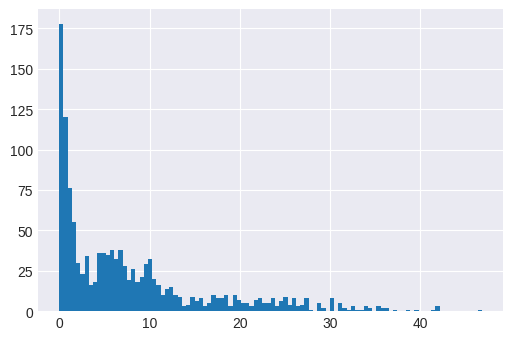

In [32]:
df = pd.read_csv("problem6.csv")
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi= 100) 
x = df["x"]
ax.hist(x, bins=100)
dist1 = stats.norm(loc=5.4, scale=1.4)
dist2 = stats.norm(loc=10.2, scale=1.8)
dist3 = stats.gamma(a=1, scale=1)
dist4 = stats.chi2(df=22)
dists = [dist1, dist2, dist3, dist4]
pis = np.asarray([0.25, 0.15, 0.4, 0.2]);

### Question 6.1

In [33]:
# 6.1 Compute the log likelihood of each component given the data set
L1 = dist1.logpdf(x).sum()
L2 = dist2.logpdf(x).sum()
L3 = dist3.logpdf(x).sum()
L4 = dist4.logpdf(x).sum()
print("Log likelihood of each component", L1, L2, L3, L4)

Log likelihood of each component -27258.13337829568 -17399.620975891412 -9899.04772465803 -18915.689711045896


### Question 6.2

In [34]:
# 6.2 Compute the log likelihood of the mixture distribution given the data set
def mixture_loglikelihood(x, dists, pis):
    return np.log(np.vectorize(lambda t: np.asarray([pis[k]*dist.pdf(t) for k, dist in enumerate(dists)]).sum())(x)).sum()

L = mixture_loglikelihood(x, dists, pis)    
print("Log likelihood of the mixture distribution", L)

Log likelihood of the mixture distribution -3735.8887937502027


### Question 6.3

In [35]:
# 6.3 Find an optimal cluster for each data point in the data set using the maximum a posteriori estimation method
def pi_loglikelihood(x, dists, pis):
    return np.asarray([pis[i]+dist.logpdf(x) for i, dist in enumerate(dists)]).T

pl = pi_loglikelihood(x, dists, pis)
clusters = pl.argmax(axis=1)
n_x_clusters = []
for i in range(4):
    n_x_clusters.append(sum(clusters==i))
print("Data points in each cluster:", n_x_clusters)

Data points in each cluster: [311, 232, 490, 233]


### Question 6.4

In [36]:
# 6.4 Given the clusters estimated from question 6.3, compute the posterior of each component 
# given all data points associated with cluster 1
x_cluster1 = x[clusters==0]

def mixture_likelihood(x, dists, pis):
    return (np.vectorize(lambda t: np.asarray([pis[k]*dist.pdf(t) for k, dist in enumerate(dists)]).sum())(x)).prod()


def pi_likelihoods(x, dists, pis):
    return np.asarray([pis[i]*dist.pdf(x).prod() for i, dist in enumerate(dists)])


pi_likelihood_cluster1 = pi_likelihoods(x_cluster1, dists, pis)

__pis = []
normalization_constant = pi_likelihood_cluster1.sum()
for i in range(4): # for each component      
    print("Posterior for component %i:"%(i+1), pi_likelihood_cluster1[i]/normalization_constant)

Posterior for component 1: 1.0
Posterior for component 2: 0.0
Posterior for component 3: 0.0
Posterior for component 4: 0.0


### Question 6.5

From the Q-Q plot, we conclude that they are not from the same family of distributions


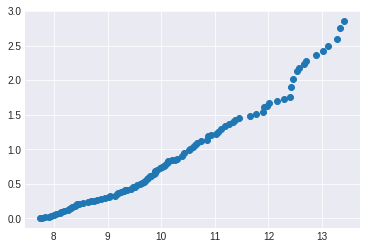

In [37]:
ps = np.linspace(0, 1, 100, endpoint=False) 
x_cluster2 = x[clusters==1]
x_cluster3 = x[clusters==2]
q_2 = np.quantile(x_cluster2, ps)
q_3 = np.quantile(x_cluster3, ps)
fig, ax = plt.subplots(1, 1)
ax.scatter(q_2, q_3)
print("From the Q-Q plot, we conclude that they are not from the same family of distributions")

### Question 6.6

In [38]:
def pi_likelihood(x, dists, pis):
    return np.asarray([pis[i]*dist.pdf(x) for i, dist in enumerate(dists)]).T

# This is essentially the same as the K-means from assignment 3; the update steps (E and M steps) need to be modified   
init_mus = [0, 5, 10, 15]    
def EM(x, K, max_itr=5000, init_mus=None):
    if init_mus:
        mus = init_mus
    else:
        mus = [x.min()+i/(K+1)*(x.max()-x.min()) for i in range(K)]
    stds = np.ones(K)
    pis = 1/K*np.ones(K)
    N = x.size
    dists = []
    for k in range(K): 
        dists.append(stats.norm(loc=mus[k], scale=stds[k]))    
    prev_likelihood = mixture_loglikelihood(x, dists, pis)
    for i in range(max_itr):
        pl = pi_likelihood(x, dists, pis)
        for k in range(K): 
            gamma_k = np.divide(pl[:, k], pl.sum(axis=1))
            N_k = gamma_k.sum()
            pis[k] = N_k/N 
            mus[k] = 1/(N_k)*(gamma_k*x).sum()
            stds[k] = np.sqrt(1/(N_k)*(gamma_k*(x-mus[k])**2).sum())
            dists[k] = stats.norm(loc=mus[k], scale=stds[k])
            
        if i%500==0 and i!=0:
            likelihood = mixture_loglikelihood(x, dists, pis)
            print("Iteration %i:"%i, prev_likelihood, likelihood)
            if abs(likelihood - prev_likelihood)<=1e-8:
                print("Converged around %i iterations"%i)
                break             
            prev_likelihood = likelihood    
           
    return mus, stds, pis, likelihood
mus, stds, pis, likelihood = EM(x, 4, init_mus=init_mus)
print("means:", mus)
print("stand deviations:", stds)
print("pis", pis)
print("likelihood", likelihood)
print("It is smaller than the theoretical likelihood due to the inaccurate assumption of the distributions and limited data points available for the estimations")



Iteration 500: -16597.91576185692 -3815.51898479026
Iteration 1000: -3815.51898479026 -3815.4327593655803
Iteration 1500: -3815.4327593655803 -3815.372820859192
Iteration 2000: -3815.372820859192 -3815.3694934959626
Iteration 2500: -3815.3694934959626 -3815.3694627715954
Iteration 3000: -3815.3694627715954 -3815.369462549782
Iteration 3500: -3815.369462549782 -3815.369462548214
Converged around 3500 iterations
means: [0.6462897912119343, 3.7861651541059365, 8.223535203113126, 20.793919976719945]
stand deviations: [0.47224885 1.81355222 2.73043012 8.15260877]
pis [0.30495243 0.19667686 0.27729193 0.22107878]
likelihood -3815.369462548214
It is smaller than the theoretical likelihood due to the inaccurate assumption of the distributions and limited data points available for the estimations
